Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [17]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from autoemcee import ReactiveAffineInvariantSampler

sampler = ReactiveAffineInvariantSampler(paramnames, loglike, transform)

results = sampler.run()

sampler.print_results()

[autoemcee] finding starting points and running initial 100 MCMC steps


100%|██████████| 100/100 [00:00<00:00, 927.28it/s]


[autoemcee] rhat chain diagnostic: [1.07578334 1.08435227] (<1.2 is good)
[autoemcee] converged!!!

    Hinz                0.499 +- 0.058
    Kunz                0.496 +- 0.062


The chains converged and we got parameter and uncertainty estimates.

In [18]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 80400 times.


Visualisation
--------------------

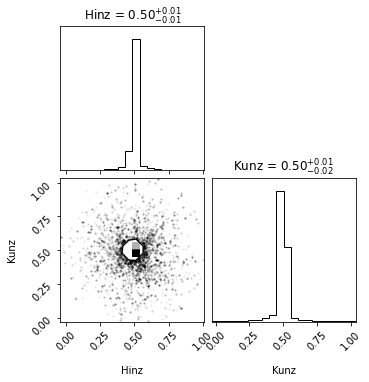

In [19]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [20]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

import logging
logging.getLogger('autoemcee').setLevel(logging.DEBUG)

sampler = ReactiveAffineInvariantSampler(paramnames, loglike_rosen, transform=transform_rosen)
result = sampler.run(max_ncalls=1000000)


[autoemcee] finding starting points and running initial 100 MCMC steps


INFO:autoemcee:finding starting points and running initial 100 MCMC steps
DEBUG:autoemcee:global sampling for starting point ...
100%|██████████| 100/100 [00:00<00:00, 705.27it/s]
DEBUG:autoemcee:global sampling for starting point ...
100%|██████████| 100/100 [00:00<00:00, 722.22it/s]
DEBUG:autoemcee:global sampling for starting point ...
100%|██████████| 100/100 [00:00<00:00, 698.93it/s]
DEBUG:autoemcee:global sampling for starting point ...
100%|██████████| 100/100 [00:00<00:00, 711.28it/s]
DEBUG:autoemcee:checking convergence (iteration 1) ...
DEBUG:autoemcee:acceptance rates: [ 3  5  7  9  9 10 11 11]% (worst few)
DEBUG:autoemcee:autocorrelation length: tau=inf -> 0x lengths
DEBUG:autoemcee:acceptance rates: [ 4  4  6  8  9  9  9 10]% (worst few)
DEBUG:autoemcee:autocorrelation length: tau=inf -> 0x lengths
DEBUG:autoemcee:acceptance rates: [ 3  6  8  9  9 10 11 11]% (worst few)
DEBUG:autoemcee:autocorrelation length: tau=inf -> 0x lengths
DEBUG:autoemcee:acceptance rates: [ 4  7  

[autoemcee] rhat chain diagnostic: [1.00743679 1.00573425] (<1.2 is good)


INFO:autoemcee:rhat chain diagnostic: [1.00743679 1.00573425] (<1.2 is good)


[autoemcee] converged!!!


INFO:autoemcee:converged!!!


This already took quite a bit more effort.

In [22]:
print("Loglikelihood was called %d times." % result['ncall'])

Loglikelihood was called 80400 times.


Lets see how well it did:

In [23]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=result['samples'],
                       names=result['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3))

mcsamples = [samples_g]


Removed no burn in


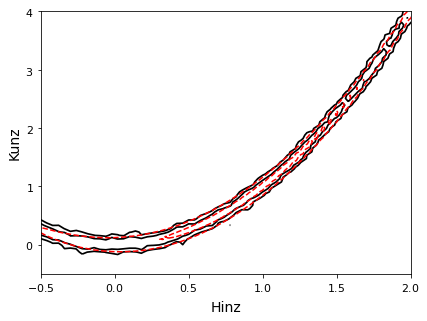

In [46]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-5, -1, 0], colors='red')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the MCMC sampler (black) is approximating the rosenbrock curvature (red).

Removed no burn in


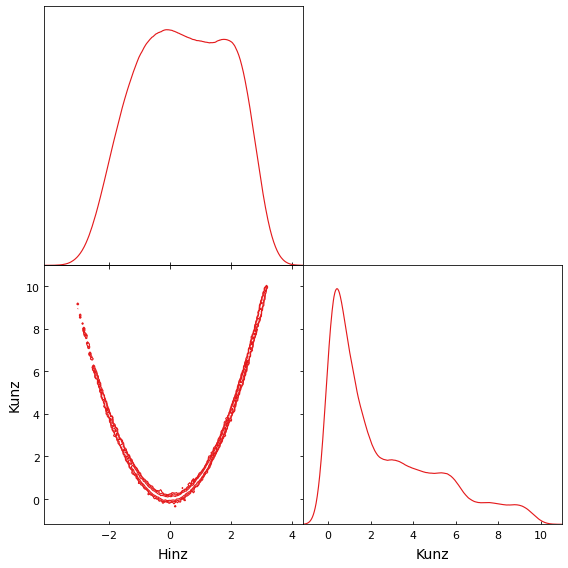

In [47]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=result['samples'],
                       names=result['paramnames'],
                       label='Gaussian')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);